## Implementing linear regression with gradient descent

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
data = pd.read_csv("./data.csv")

In [92]:
data.insert(0, 'x_1', data['x'])
data.insert(0, 'x_0', 1)
data = data.drop('x', axis=1)

In [93]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1:].values

In [94]:
# The hypothesis function
def h(p, x):
    return np.transpose(np.transpose(p) @ np.transpose(x))

In [95]:
# The cost function
def cost(p, x, y):
    preds = h(p, x)
    return np.sum((preds - y) ** 2) / y.shape[0]

In [136]:
alpha = 0.01 # Learning rate

In [97]:
def gradient_descent(p, x, y, alpha):
    preds = h(p, x)
    D = np.transpose(preds - y) @ x
    return p - ((alpha / y.shape[0]) * np.transpose(D))

In [137]:
# Trains a model and returns the final values of parameters
def train(x, y, alpha):
    parameters = np.array([0,0]).reshape(2,1) # Starting values as [0, 0]
    
    iterations = 100
    batch_size = 100 
    
    cost_history = []
    iter_history = []
    
    for i in range(1, iterations + 1):
        for _ in range(batch_size):
            parameters = gradient_descent(parameters, x, y, alpha)
        
        iter_history.append(i)
        cost_history.append(cost(parameters, x, y))
        
#     print(np.array(iter_history) * batch_size)
#     print(cost_history)
    
    plt.plot(np.array(iter_history)  * batch_size, cost_history)
    plt.ylabel("Cost")
    plt.xlabel("Iterations")
    
    return parameters

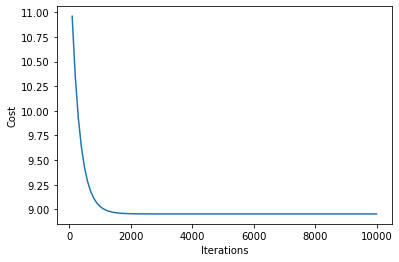

In [141]:
P = train(X, Y, alpha)

Here we have the plot for cost vs iterations, we can see the cost clearly decreases gradually after every iteration. So whatever calculations carried out above has actually worked!!!

In [142]:
print("Parameters: ", P)

Parameters:  [[-3.89578082]
 [ 1.19303364]]


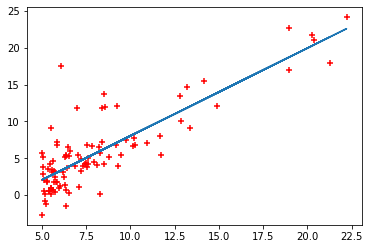

In [127]:
plt.scatter(data['x_1'], data['y'], marker="+", c="red", )
plt.plot(data['x_1'], h(P, X))

And thats the regression line drawn form the values of paraments obtained form the train() function, It fits the data perfectly. Yay!!!

# All done!!!